#**Dimensionality Reduction using AutoEncoders in Python**

##**Dimensionality Reduction**
Dimensionality Reduction is the process of reducing the number of dimensions in the data either by excluding less useful features (Feature Selection) or transform the data into lower dimensions (Feature Extraction). Dimensionality reduction prevents overfitting. Overfitting is a phenomenon in which the model learns too well from the training dataset and fails to generalize well for unseen real-world data.

###Types of Feature Selection for Dimensionality Reduction,

1. Recursive Feature Elimination
2. Genetic Feature Selection
3. Sequential Forward Selection

###Types of Feature Extraction for Dimensionality Reduction,

1. AutoEncoders
2. Principal Component Analysis (PCA)
3. Linear Determinant Analysis (LDA)

In this post, let us elaborately see about AutoEncoders for dimensionality reduction.

##AutoEncoders
AutoEncoder is an unsupervised Artificial Neural Network that attempts to encode the data by compressing it into the lower dimensions (bottleneck layer or code) and then decoding the data to reconstruct the original input. The bottleneck layer (or code) holds the compressed representation of the input data.

In AutoEncoder the number of output units must be equal to the number of input units since we’re attempting to reconstruct the input data. AutoEncoders usually consist of an encoder and a decoder. The encoder encodes the provided data into a lower dimension which is the size of the bottleneck layer and the decoder decodes the compressed data into its original form.

The number of neurons in the layers of the encoder will be decreasing as we move on with further layers, whereas the number of neurons in the layers of the decoder will be increasing as we move on with further layers. There are three layers used in the encoder and decoder in the following example. The encoder contains 32, 16, and 7 units in each layer respectively and the decoder contains 7, 16, and 32 units in each layer respectively. The code size/ the number of neurons in bottle-neck must be less than the number of features in the data.

Before feeding the data into the AutoEncoder the data must definitely be scaled between 0 and 1 using MinMaxScaler since we are going to use sigmoid activation function in the output layer which outputs values between 0 and 1.

When we are using AutoEncoders for dimensionality reduction we’ll be extracting the bottleneck layer and use it to reduce the dimensions. This process can be viewed as feature extraction.

The type of AutoEncoder that we’re using is Deep AutoEncoder, where the encoder and the decoder are symmetrical. The Autoencoders don’t necessarily have a symmetrical encoder and decoder but we can have the encoder and decoder non-symmetrical as well.

###Types of AutoEncoders available are,

1. Deep Autoencoder
2. Sparse Autoencoder
3. Under complete Autoencoder
4. Variational Autoencoder
5. LSTM Autoencoder

###Hyperparameters of an AutoEncoder
1. Code size or the number of units in the bottleneck layer
2. Input and output size, which is the number of features in the data
3. Number of neurons or nodes per layer
4. Number of layers in encoder and decoder.
5. Activation function
6. Optimization function

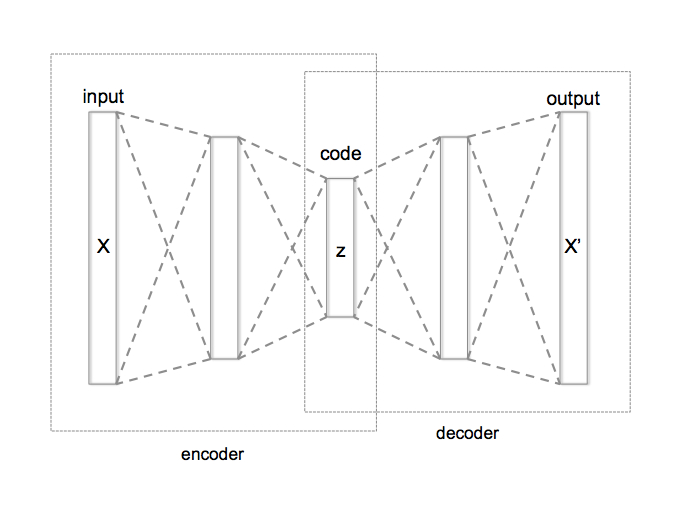

##**Applications of AutoEncoders**
1. Dimensionality reduction
2. Anomaly detection
3. Image denoising
4. Image compression
5. Image generation

In [1]:
!pip install keras-tuner -q
import math
import pandas as pd
import tensorflow as tf
import keras_tuner as kt #Fixed import statement
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [2]:
# data in google colab
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [3]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
train_data.shape, test_data.shape

((17000, 9), (3000, 9))

In [6]:
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]


In [7]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [8]:
y_train.head()

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [9]:
#Scale the dataset using MinMaxScaler.

from sklearn.preprocessing import MinMaxScaler

def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  """
  standard_scaler = MinMaxScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [10]:
x_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281


In [11]:
#Train the autoencoder with the training data.


class AutoEncoders(Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(32, activation="relu"),
          Dense(16, activation="relu"),
          Dense(7, activation="relu")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(16, activation="relu"),
          Dense(32, activation="relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

  def call(self, inputs): #Fixed indentation so call is now part of AutoEncoders class

    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [12]:
auto_encoder = AutoEncoders(len(x_train_scaled.columns))

In [13]:
len(x_train_scaled.columns)

8

In [14]:
auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

Here we have defined the autoencoder model by subclassing the Model class in Tensorflow and we **compile the AutoEncoder model with mean absolute error and adam optimization function.** We split the data into batches of 32 and we run it for 100 epochs.

In [15]:
history = auto_encoder.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1367 - mae: 0.1367 - val_loss: 0.0289 - val_mae: 0.0289
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0277 - mae: 0.0277 - val_loss: 0.0216 - val_mae: 0.0216
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0178 - mae: 0.0178 - val_loss: 0.0143 - val_mae: 0.0143
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0143 - mae: 0.0143 - val_loss: 0.0136 - val_mae: 0.0136
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0130 - mae: 0.0130 - val_loss: 0.0126 - val_mae: 0.0126
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0120 - mae: 0.0120 - val_loss: 0.0109 - val_mae: 0.0109
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104 - mae: 0.0104 - val_loss: 0.0091 - val_mae: 0.0091
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0086 - mae: 0.0086 - val_loss: 0.0080 - val_mae: 0.0080
Epoch 9/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/

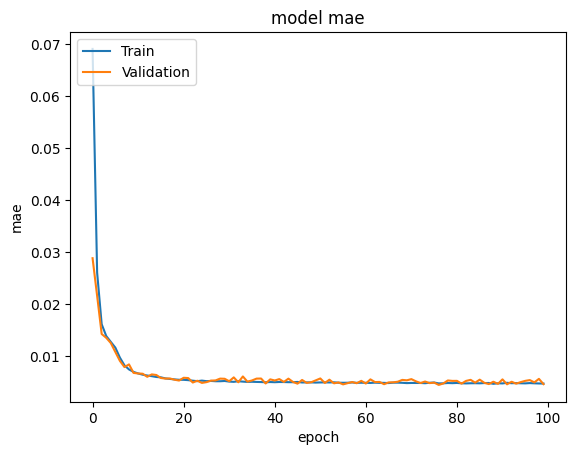

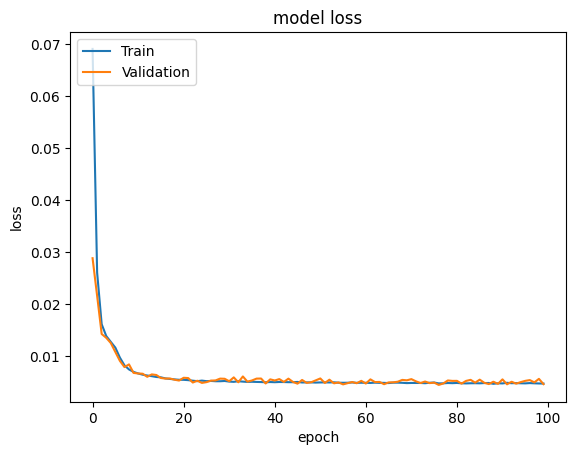

In [23]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

###Get the encoder layer and use the method predict to reduce dimensions in data. Since we have **seven hidden units in the bottleneck the data is reduced to seven features.**

In [16]:
encoder_layer = auto_encoder.get_layer('sequential')

In [17]:
encoder_layer.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             119 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 935 (3.65 KB)

 Trainable params: 935 (3.65 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
reduced_df = pd.DataFrame(encoder_layer.predict(x_train_scaled))

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [19]:
reduced_df.head()

,0,1,2,3,4,5,6
0,0.310287,0.297255,0.344008,2.130002,0.0,0.354450,0.0
1,0.316918,0.204823,0.420900,1.961384,0.0,0.265183,0.0
2,0.703504,0.690992,0.638985,2.527837,0.0,0.970424,0.0
3,0.455234,0.392441,0.501490,2.173647,0.0,0.952661,0.0
4,0.540404,0.502835,0.656347,2.320713,0.0,0.763649,0.0


In [20]:
reduced_df = reduced_df.add_prefix('feature_')

In [21]:
reduced_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,0.310287,0.297255,0.344008,2.130002,0.0,0.354450,0.0
1,0.316918,0.204823,0.420900,1.961384,0.0,0.265183,0.0
2,0.703504,0.690992,0.638985,2.527837,0.0,0.970424,0.0
3,0.455234,0.392441,0.501490,2.173647,0.0,0.952661,0.0
4,0.540404,0.502835,0.656347,2.320713,0.0,0.763649,0.0


##In this way, AutoEncoders can be used to reduce dimensions in data.

